In [2]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#creating colormap

import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

colors = ["lavender", "lightpink", "peachpuff"]
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

In [6]:
# couper les textes à toutes les occurrences de \.\s, afin d'avoir toutes les annonces séparément
# sélectionner les annonces d'emploi avec des mots-clés: PLACE, SE PLACER, PLACÉ
# créer dataframe avec ville, date, texte de l'annonce


df_lyon = pd.DataFrame(columns = ["Ville", "Année", "Mois", "Jour", "Annonces"])
path="./OCR_Annonces_Lyon"
for dossier_année in os.listdir(path):
    if dossier_année.startswith("FULL"):
        new_path=os.path.join(path,dossier_année)
        os.chdir(new_path)
        for fichier in os.scandir(new_path):
            liste=[]
            nom=os.path.basename(fichier)
            resultat_nom=re.search(r"FULL_OCR_Annonces_(.*)_(\d{4})_(\d{2})_(\d{2}).txt", nom)
            ville=resultat_nom.group(1)
            liste.append(ville)
            année=resultat_nom.group(2)
            liste.append(année)
            mois=resultat_nom.group(3)
            liste.append(mois)
            jour=resultat_nom.group(4)
            liste.append(jour)

            with open(fichier, 'r') as texte:
                annonces=re.findall(r".*?(?<!S'adr)(?<!S'ad)(?<!S'adr)(?<!Mad)(?<!M)\.\n, texte.read(), re.DOTALL)
                liste_annonces=[]
                for annonce in annonces:
                    annonce=annonce.replace("\n", " ") # correction des \n, des ſ et des espaces superflus
                    annonce=annonce.replace("ſ", "s")
                    annonce=annonce.replace("- ", "-")
                    annonce=annonce.replace("sachaut", "sachant")
                    annonce=annonce.replace("*", ".")
                    nombre_page=re.compile(r"\(\s?\d{3,4}\s?\)?", re.IGNORECASE)
                    annonce=re.sub(nombre_page, " ", annonce)
                    annonce_emploi=re.compile(r"(une|être|se) place?é?r?", re.IGNORECASE)
                    annonce_chaise=re.compile(r"(?:à une place)|(?:chaise)", re.IGNORECASE) #exclure les annonces de chaises
                    if annonce_emploi.search(annonce) and not annonce_chaise.search(annonce):
                        liste_annonces.append(annonce)

            liste.append(liste_annonces)

            df_lyon.loc[len(df_lyon)] = liste
            
df_lyon

,Ville,Année,Mois,Jour,Annonces
0,Lyon,1803,12,31,"[Un Jeune-homme hors de la conscription, appar..."
1,Lyon,1803,12,27,"[Un Jeune-homme Allemand, agé d'environ vingt-..."
2,Lyon,1803,12,24,"[Un Particulier qui a une très-belle plume, of..."
3,Lyon,1803,12,19,"[Un Particulier d'un âge mûr, propriétaire dan..."
4,Lyon,1803,12,15,[Une jeuse Veuve qui jouit de la meilleure san...
...,...,...,...,...,...
1184,Lyon,1750,02,10,[]
1185,Lyon,1750,02,04,[]
1186,Lyon,1750,01,27,[ Une personne connue qui sçait tenir les Li-v...
1187,Lyon,1750,01,20,[]


In [9]:
# assembler les trois df

df=pd.concat([df_paris, df_lyon, df_bordeaux], ignore_index=True)

In [10]:
# dataframe avec une annonce par ligne

df=df.explode("Annonces")

In [11]:
# sans na

df=df.dropna()
df

,Ville,Année,Mois,Jour,Annonces
0,Paris,1804,03,30,"Une personne de 24 ans, d'un extérieur agréabl..."
0,Paris,1804,03,30,"Une demoiselle, âgée de 28 ans, sachant parfai..."
0,Paris,1804,03,30,"Une femme de 30 ans, sachant faire la cuisine,..."
0,Paris,1804,03,30,"Un citoyen d'un âge mûr, sachant raser, coëffe..."
0,Paris,1804,03,30,"Une jeune personne, âgée de 17 ans, sachant li..."
...,...,...,...,...,...
2865,Bordeaux,1758,11,09,Un jeune homme qui a tenu pendant trois ans le...
2867,Bordeaux,1758,08,01,"Un jeune homme de 23 à 24 ans, qui sçait bien ..."
2872,Bordeaux,1759,06,14,"„ Minimes, qui commençoient à s'établir en » F..."
2881,Bordeaux,1760,03,06,Le sacrifice que les Français ont fait de leur...


In [12]:
df.to_csv('./df_final.csv', index=False)

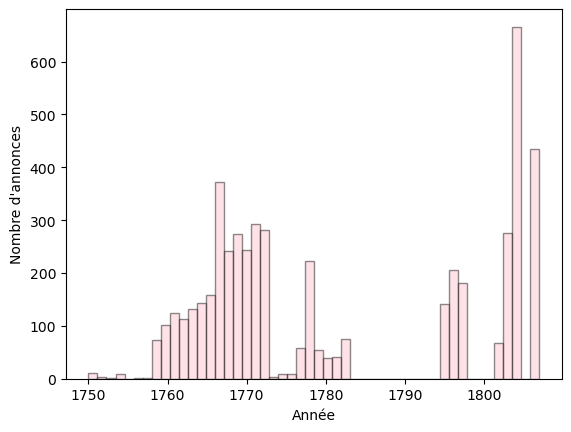

In [49]:
# plot nombre d'annonces par an

plt.hist(df['Année'], bins=50, alpha=0.45, color='pink', edgecolor='black')
  
plt.xlabel('Année')
plt.ylabel('Nombre d\'annonces')
plt.show()

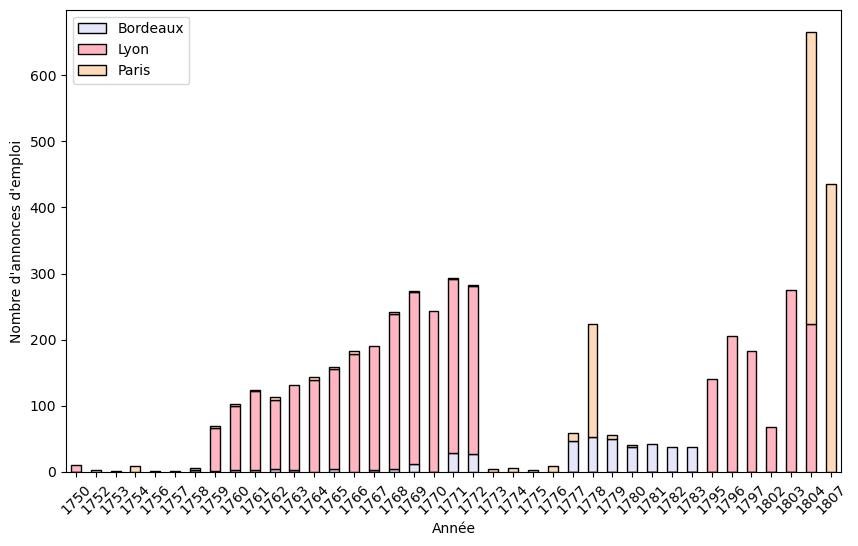

In [12]:
# plot nombre d'annonces par an par ville

df_grouped = df.groupby(['Année', 'Ville']).size().unstack()

ax=df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap1, edgecolor='black')
plt.xlabel('Année')
plt.ylabel("Nombre d\'annonces d'emploi")
plt.legend()
plt.xticks(rotation=45)

plt.show()